In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1568
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               744 non-null    int64  
 1   Glucose                   744 non-null    int64  
 2   BloodPressure             744 non-null    int64  
 3   SkinThickness             744 non-null    int64  
 4   Insulin                   744 non-null    int64  
 5   BMI                       744 non-null    float64
 6   DiabetesPedigreeFunction  744 non-null    float64
 7   Age                       744 non-null    int64  
 8   Outcome                   744 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.1 KB


<AxesSubplot:>

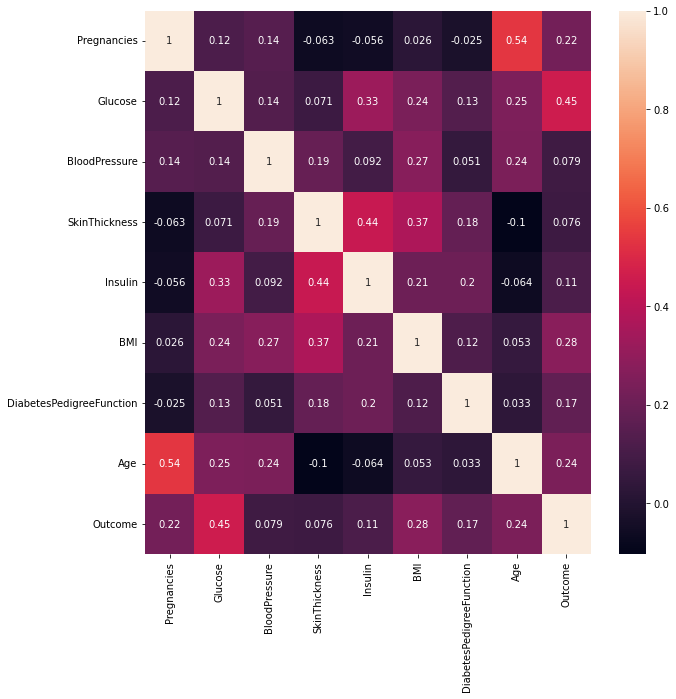

In [6]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2g")

0    491
1    253
Name: Outcome, dtype: int64


<AxesSubplot:xlabel='Outcome', ylabel='count'>

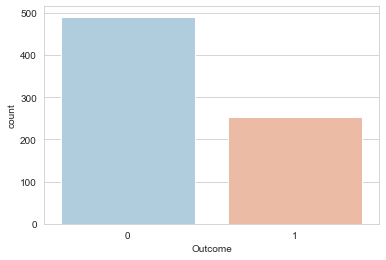

In [7]:
print(df["Outcome"].value_counts())

sns.set_style("whitegrid")
sns.countplot(x = "Outcome", data=df, palette="RdBu_r")

0 -> Non-Diabetic
1 -> Diabetic

In [8]:
df.groupby("Outcome").mean()

Pregnancies     Glucose  BloodPressure  SkinThickness    Insulin  \
Outcome                                                                     
0           3.224033  110.490835      67.867617      20.024440  70.344196   
1           4.778656  141.079051      71.079051      22.624506  97.371542   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.592464                  0.431481  31.101833  
1        35.407115                  0.551680  37.102767

In [9]:
X = df.drop(columns="Outcome",axis=1)
Y = df["Outcome"]

# Standardizing the data

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

standardized_X = scaler.fit_transform(X)
X = standardized_X
Y =  df["Outcome"]

# Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.15,stratify=Y,random_state=42)

In [14]:
print(X.shape,X_train.shape,X_test.shape)

(744, 8) (632, 8) (112, 8)


# Training the model

In [15]:
from sklearn import svm

svm_classifier = svm.SVC(kernel="linear")
svm_classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [16]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train,Y_train)

LogisticRegression()

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,Y_train)

RandomForestClassifier()

# Model Evaluation

In [19]:
from sklearn.metrics import accuracy_score

#SVM
X_train_prediction_SVM = svm_classifier.predict(X_train)
train_acc_SVM = accuracy_score(X_train_prediction_SVM,Y_train)

X_test_prediction_SVM = svm_classifier.predict(X_test)
test_acc_SVM = accuracy_score(X_test_prediction_SVM,Y_test)

#Logistic Regression
X_train_prediction_lr = lr_classifier.predict(X_train)
train_acc_lr = accuracy_score(X_train_prediction_lr,Y_train)

X_test_prediction_lr = lr_classifier.predict(X_test)
test_acc_lr = accuracy_score(X_test_prediction_lr,Y_test)

#Decision Tree
X_train_prediction_dt = dt_classifier.predict(X_train)
train_acc_dt = accuracy_score(X_train_prediction_dt,Y_train)

X_test_prediction_dt = dt_classifier.predict(X_test)
test_acc_dt = accuracy_score(X_test_prediction_dt,Y_test)

#Random Forest
X_train_prediction_rf = rf_classifier.predict(X_train)
train_acc_rf = accuracy_score(X_train_prediction_rf,Y_train)

X_test_prediction_rf = rf_classifier.predict(X_test)
test_acc_rf = accuracy_score(X_test_prediction_rf,Y_test)

print("Training Accuracy:-\n1. SVM\t\t\t",train_acc_SVM,"\n2. Logistic Regression\t",train_acc_lr,"\n3. Decision Tree\t",train_acc_dt,"\n4. Random Forest\t",train_acc_rf)
print("\n\nTest Accuracy:-\n1. SVM\t\t\t",test_acc_SVM,"\n2. Logistic Regression\t",test_acc_lr,"\n3. Decision Tree\t",test_acc_dt,"\n4. Random Forest\t",test_acc_rf)

Training Accuracy:-
1. SVM			 0.7895569620253164 
2. Logistic Regression	 0.7768987341772152 
3. Decision Tree	 1.0 
4. Random Forest	 1.0


Test Accuracy:-
1. SVM			 0.7410714285714286 
2. Logistic Regression	 0.75 
3. Decision Tree	 0.75 
4. Random Forest	 0.7589285714285714


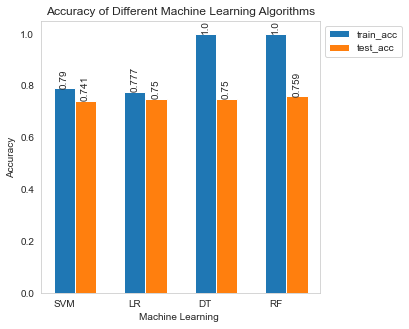

In [20]:
algo_names = ["SVM","LR","DT","RF"]
train_acc = [round(train_acc_SVM,3),round(train_acc_lr,3),round(train_acc_dt,3),round(train_acc_rf,3)]
test_acc =[round(test_acc_SVM,3),round(test_acc_lr,3),round(test_acc_dt,3),round(test_acc_rf,3)]
X_axis = np.arange(len(algo_names))

plt.figure(figsize=(5,5))
bar_width = 0.3
plt.bar(algo_names, train_acc, width=bar_width, align='center', label='train_acc')
plt.bar([i + bar_width for i in range(len(algo_names))], test_acc, width=bar_width, align='center', label='test_acc')

for i, model in enumerate(algo_names):
    plt.text(i, train_acc[i], str(train_acc[i]), ha='center', va='bottom', rotation=90)
    plt.text(i + bar_width, test_acc[i], str(test_acc[i]), ha='center', va='bottom', rotation=90)

plt.xticks(X_axis, algo_names)
plt.xlabel("Machine Learning ")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Machine Learning Algorithms")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim(top=max(max(train_acc), max(test_acc)) + 0.05)
plt.grid(visible=False)
plt.show()

# Model Prediction

Input Data:-

1,181,64,30,180,34.1,0.328,38  1
0,135,94,46,145,40.6,0.284,26  0
1,95,82,25,180,35,0.233,43     1
2,99,0,0,0,22.2,0.108,23       0

In [21]:
#USING TEST DATA
input_data = (0,135,94,46,145,40.6,0.284,26)

# Converting input data into a numpy array
input_data = np.asarray(input_data)

# Reshaping the numpy array to inform the model that only one input and not 768 is being provided
input_data = input_data.reshape(1,-1)

# Standardizing the input data
standardized_input_data = scaler.transform(input_data)

# Prediciting
prediction = lr_classifier.predict(standardized_input_data)

if prediction == 0:
    print("Prediciton Result: Non-Diabetic")
else:
    print("Prediciton Result: Diabetic")

Prediciton Result: Non-Diabetic


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#USING CUSTOM DATA
print("Enter your details:-")
name = input("Name: ")
age = int(input("Age: "))
preg = int(input("Number of pregnancies: "))
gluc = int(input("Glucose Level: "))
bp = int(input("Blood Pressure: "))
skin = int(input("Skin Thickness(in mm): "))
insulin = int(input("Insulin: "))
bmi = float(input("BMI: "))
dpf = float(input("Diabetes Pedigree Function(between 0 to 1): "))

input_data = [preg,gluc,bp,skin,insulin,bmi,dpf,age]

#Converting input data into a numpy array
input_data = np.asarray(input_data)

#Reshaping the numpy array to inform the model that only one input and not 768 is being provided
input_data = input_data.reshape(1,-1)

#Standardizing the input data
standardized_input_data = scaler.transform(input_data)

#Prediciting
prediction = lr_classifier.predict(standardized_input_data)

if prediction == 0:
    print("Prediciton Result: Non-Diabetic")
else:
    print("Prediciton Result: Diabetic")

# Saving the model

In [22]:
import pickle

filename = "diabetes_model.sav"
pickle.dump(lr_classifier,open(filename,"wb"))

In [23]:
loaded_model = pickle.load(open("diabetes_model.sav","rb"))